In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot 
import matplotlib.ticker as mtick

## Reading Dataset

In [2]:
df = pd.read_csv("D:\FCDS\Graduation Project\\building damage assessment csv data\csv_building_structure.csv",
                     index_col = 'building_id')

In [3]:
df.head()

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,1,1,9,288,9,9,Flat,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
120101000021,12,1207,120703,1,1,15,364,9,9,Flat,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
120101000031,12,1207,120703,1,1,20,384,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
120101000041,12,1207,120703,1,1,20,312,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
120101000051,12,1207,120703,1,1,30,308,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762106 entries, 120101000011 to 366709001281
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   district_id                             762106 non-null  int64 
 1   vdcmun_id                               762106 non-null  int64 
 2   ward_id                                 762106 non-null  int64 
 3   count_floors_pre_eq                     762106 non-null  int64 
 4   count_floors_post_eq                    762106 non-null  int64 
 5   age_building                            762106 non-null  int64 
 6   plinth_area_sq_ft                       762106 non-null  int64 
 7   height_ft_pre_eq                        762106 non-null  int64 
 8   height_ft_post_eq                       762106 non-null  int64 
 9   land_surface_condition                  762106 non-null  object
 10  foundation_type                        

## Data Cleaning

In [5]:
# df = df.isnull().sum().reset_index(name='count')
# display(df[df['count'] > 0])

# # Drop Rows with missing data
df.dropna(inplace = True)

In [6]:
print("number of duplicates= ",df.duplicated().sum())
#Drop duplicates
df=df.drop_duplicates()

number of duplicates=  24623


In [7]:
# drop duplicates
df=df.drop_duplicates()


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
count,737471.000000,737471.000000,737471.000000,737471.000000,737471.000000,737471.000000,737471.000000,737471.000000,737471.000000,737471.000000,737471.000000,737471.000000,737471.000000,737471.000000,737471.000000,737471.000000,737471.000000,737471.000000,737471.000000,737471.000000
mean,25.791006,2585.002507,258505.695311,2.083823,1.265373,24.005257,408.660056,16.029460,9.977195,0.042674,0.796727,0.035242,0.016289,0.023423,0.073065,0.260463,0.080920,0.040478,0.016689,0.012291
std,5.830030,583.425643,58342.640865,0.657018,1.060660,62.619270,228.655233,5.456702,8.562072,0.202122,0.402434,0.184391,0.126586,0.151244,0.260243,0.438888,0.272712,0.197076,0.128105,0.110180
min,12.000000,1201.000000,120101.000000,1.000000,0.000000,0.000000,70.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,2204.000000,220401.000000,2.000000,0.000000,8.000000,280.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,2410.000000,241005.000000,2.000000,1.000000,16.000000,360.000000,16.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,3011.000000,301102.000000,2.000000,2.000000,27.000000,476.000000,18.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,36.000000,3611.000000,361108.000000,9.000000,9.000000,999.000000,5000.000000,99.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


dealing with outlier

In [14]:
df

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,1,1,9,288,9,9,Flat,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
120101000021,12,1207,120703,1,1,15,364,9,9,Flat,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
120101000031,12,1207,120703,1,1,20,384,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
120101000041,12,1207,120703,1,1,20,312,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
120101000051,12,1207,120703,1,1,30,308,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366709001241,36,3603,360302,2,0,60,165,18,0,Flat,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
366709001251,36,3603,360302,2,0,35,342,18,0,Flat,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
366709001261,36,3603,360302,2,0,35,342,18,0,Flat,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction


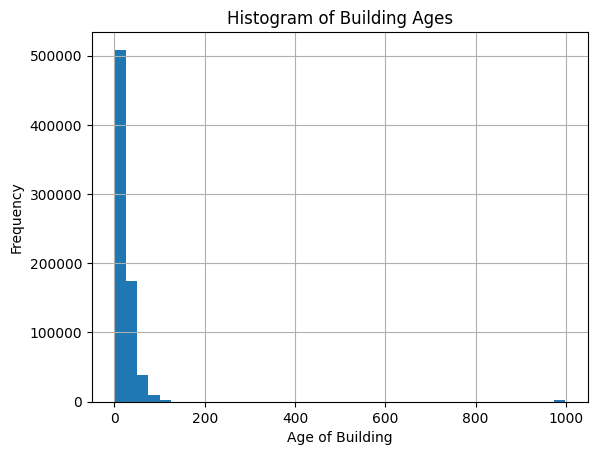

In [10]:
# Plotting the histogram for the 'age_building' column
df['age_building'].hist(bins=40) 

plt.title('Histogram of Building Ages')
plt.xlabel('Age of Building')
plt.ylabel('Frequency')
plt.show()


In [11]:
df[df.age_building==999].count()

district_id                               2801
vdcmun_id                                 2801
ward_id                                   2801
count_floors_pre_eq                       2801
count_floors_post_eq                      2801
age_building                              2801
plinth_area_sq_ft                         2801
height_ft_pre_eq                          2801
height_ft_post_eq                         2801
land_surface_condition                    2801
foundation_type                           2801
roof_type                                 2801
ground_floor_type                         2801
other_floor_type                          2801
position                                  2801
plan_configuration                        2801
has_superstructure_adobe_mud              2801
has_superstructure_mud_mortar_stone       2801
has_superstructure_stone_flag             2801
has_superstructure_cement_mortar_stone    2801
has_superstructure_mud_mortar_brick       2801
has_superstru

c:\Python\python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


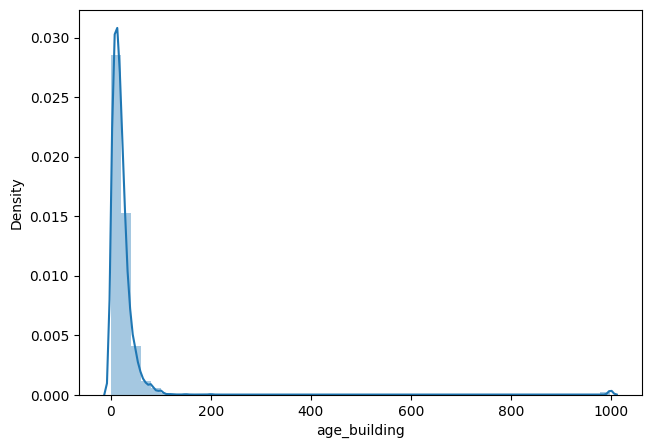

In [12]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['age_building'])
plt.show()


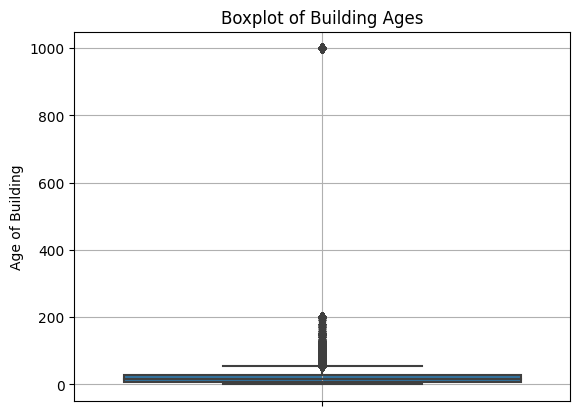

In [18]:
sns.boxplot(y=df['age_building'])

plt.title('Boxplot of Building Ages')
plt.ylabel('Age of Building')
plt.grid(True)  
plt.show()

In [13]:
percentile25 = df['age_building'].quantile(0.25)
percentile75 = df['age_building'].quantile(0.75)

In [14]:
iqr=percentile75-percentile25

In [15]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [16]:
df[df['age_building'] > upper_limit]
df[df['age_building'] < lower_limit]

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
building_id,,,,,,,,,,,,,,,,,,,,,


In [17]:
df.shape

(737471, 30)

In [18]:
new_df = df[df['age_building'] < upper_limit]
new_df.shape

(703388, 30)

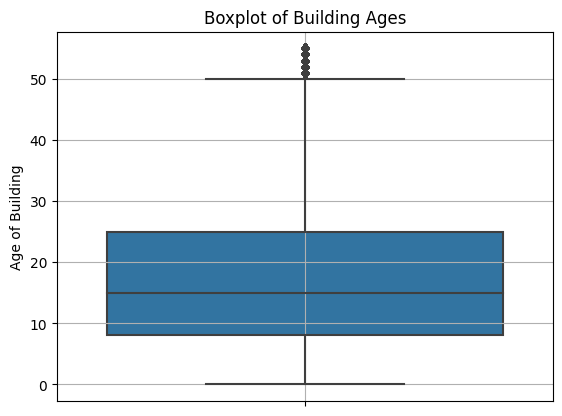

In [19]:
sns.boxplot(y=new_df['age_building'])

plt.title('Boxplot of Building Ages')
plt.ylabel('Age of Building')
plt.grid(True)  # Optional: Adds a grid for easier reading
plt.show()

In [20]:
new_df.describe()

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
count,703388.000000,703388.000000,703388.000000,703388.000000,703388.000000,703388.000000,703388.000000,703388.000000,703388.000000,703388.000000,703388.000000,703388.000000,703388.000000,703388.000000,703388.000000,703388.000000,703388.000000,703388.000000,703388.000000,703388.000000
mean,25.787471,2584.627993,258468.256378,2.075122,1.263827,17.846837,409.390099,15.981018,9.980546,0.041098,0.792504,0.034283,0.016810,0.022090,0.075982,0.263510,0.083068,0.041725,0.017397,0.012515
std,5.843243,584.746192,58474.706503,0.655549,1.055581,12.400101,229.981387,5.463126,8.544518,0.198518,0.405514,0.181954,0.128559,0.146977,0.264970,0.440537,0.275985,0.199961,0.130746,0.111169
min,12.000000,1201.000000,120101.000000,1.000000,0.000000,0.000000,70.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,2203.000000,220306.000000,2.000000,0.000000,8.000000,280.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,2410.000000,241005.000000,2.000000,1.000000,15.000000,360.000000,16.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,3011.000000,301104.000000,2.000000,2.000000,25.000000,476.000000,18.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,36.000000,3611.000000,361108.000000,9.000000,9.000000,55.000000,5000.000000,99.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
new_df_cap=df

In [22]:


new_df_cap['age_building'] = np.where(
    new_df_cap['age_building'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['age_building'] < lower_limit,
        lower_limit,
        new_df_cap['age_building']
    )
)


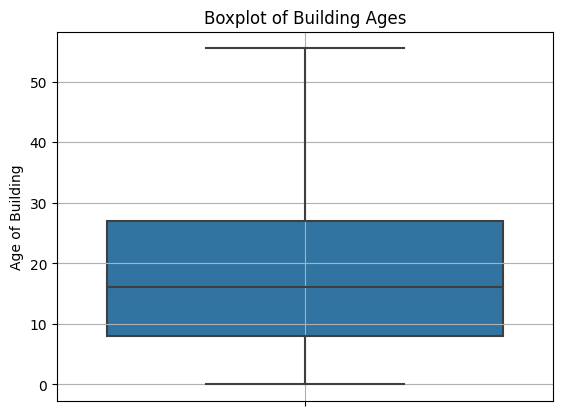

In [23]:
sns.boxplot(y=new_df_cap['age_building'])

plt.title('Boxplot of Building Ages')
plt.ylabel('Age of Building')
plt.grid(True) 
plt.show()

## Exploratory Data Analysis

In [24]:
df=new_df_cap

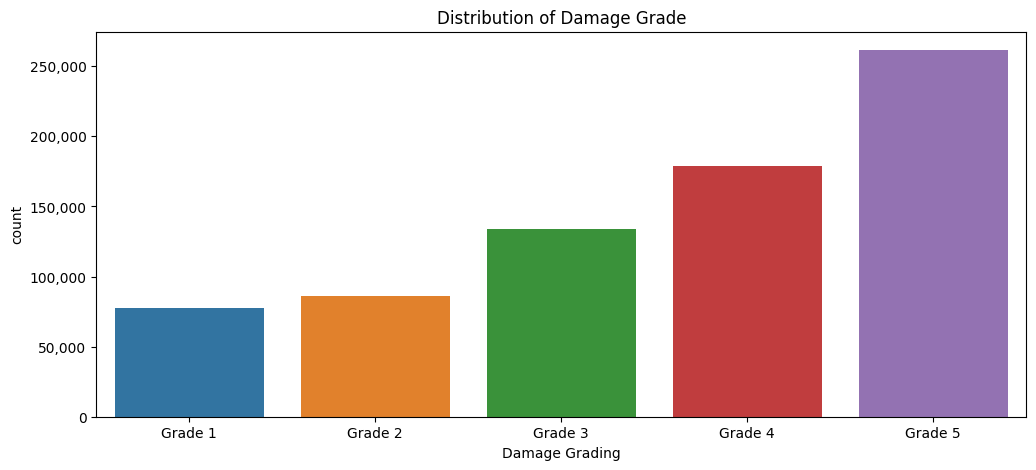

In [25]:
import matplotlib.ticker as mtick

plt.figure(figsize=(12,5))
ax = sns.countplot(x='damage_grade', data=df, order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'])
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("Distribution of Damage Grade")
plt.xlabel("Damage Grading")
plt.show()

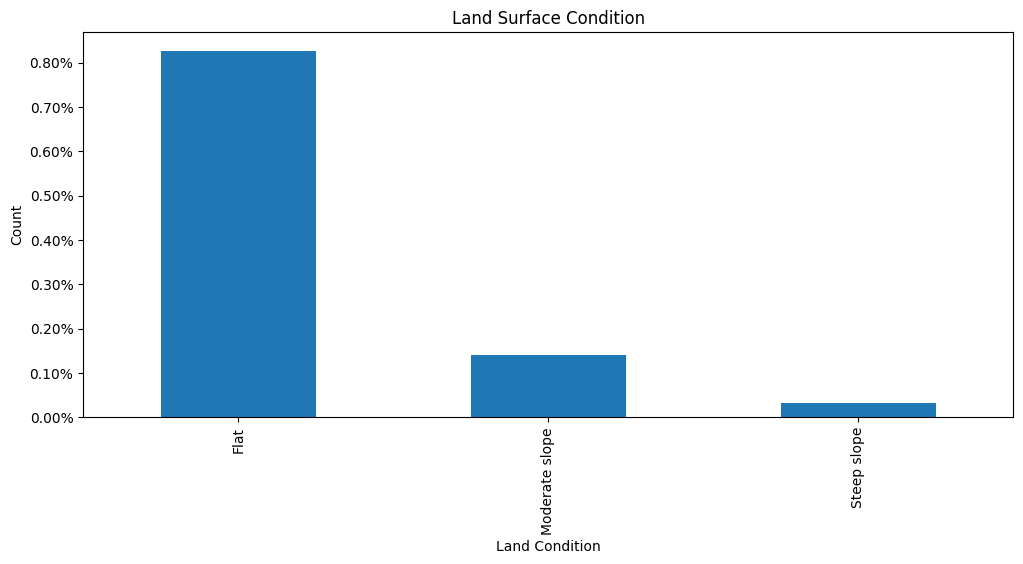

In [26]:
# Create a plot
plt.figure(figsize=(12,5))
ax = df.land_surface_condition.value_counts(normalize = True).plot(kind = "bar")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Land Surface Condition")
plt.ylabel("Count")
plt.xlabel("Land Condition")
plt.show()


In [32]:
df_stru = pd.read_csv("D:\FCDS\Graduation Project\\building damage assessment csv data\csv_building_structure.csv",
                     index_col = 'building_id')

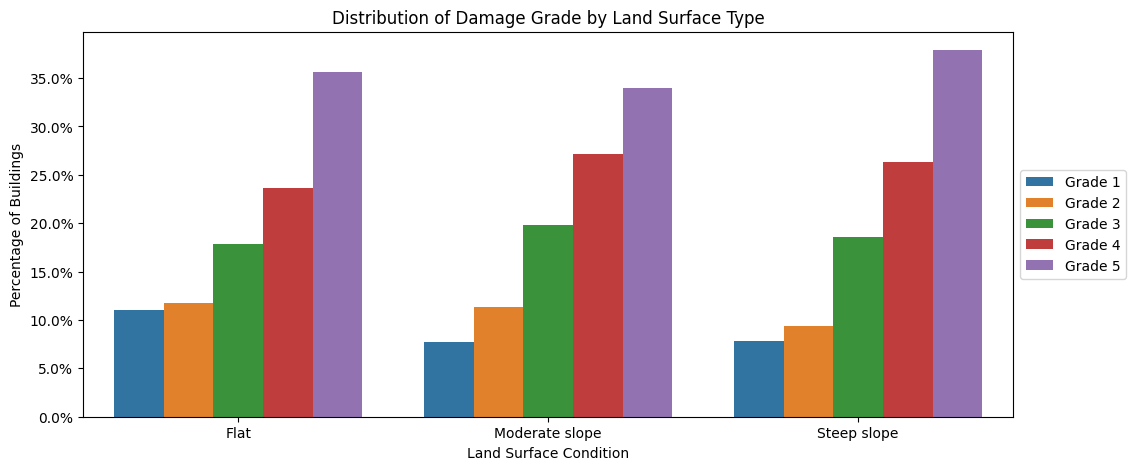

In [33]:
# Calculate counts
df_temp = df.groupby(['land_surface_condition','damage_grade']).size().reset_index(name='count')

# Calculate Proportion of grade
df_temp['percentage'] = df_temp.groupby('land_surface_condition')['count'].transform(lambda x: 100 * x / float(x.sum()))

# Plot chart
plt.figure(figsize=(12,5))
ax = sns.barplot(data=df_temp, x='land_surface_condition', y='percentage', hue='damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Land Surface Type")
plt.xlabel("Land Surface Condition")
plt.ylabel("Percentage of Buildings")

# Show the plot
plt.show()



In [34]:
df.foundation_type.value_counts()

Mud mortar-Stone/Brick    606046
Bamboo/Timber              56407
Cement-Stone/Brick         38797
RC                         31757
Other                       4464
Name: foundation_type, dtype: int64

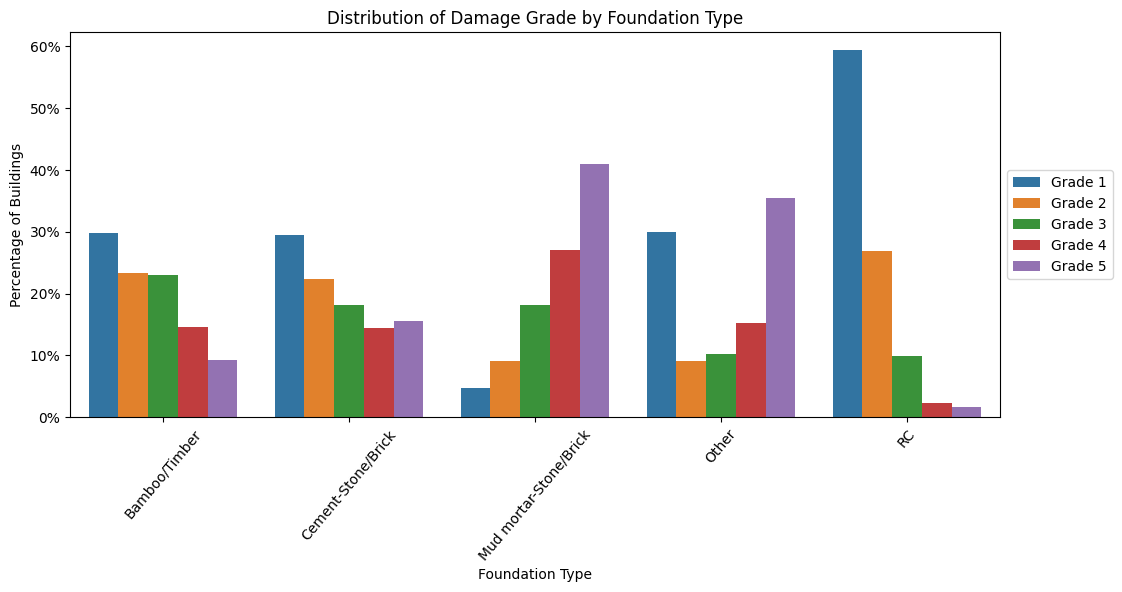

In [35]:

# Calculate counts
df_temp = df.groupby(['foundation_type', 'damage_grade']).size().reset_index(name='count')

# Calculate Proportion of grade
total_counts = df_temp.groupby('foundation_type')['count'].transform('sum')
df_temp['percentage'] = 100 * df_temp['count'] / total_counts

# Plot chart
plt.figure(figsize=(12,5))
ax = sns.barplot(data=df_temp, x='foundation_type', y='percentage', hue='damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xticks(rotation=50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.title("Distribution of Damage Grade by Foundation Type")
plt.xlabel("Foundation Type")
plt.ylabel("Percentage of Buildings")

plt.show()


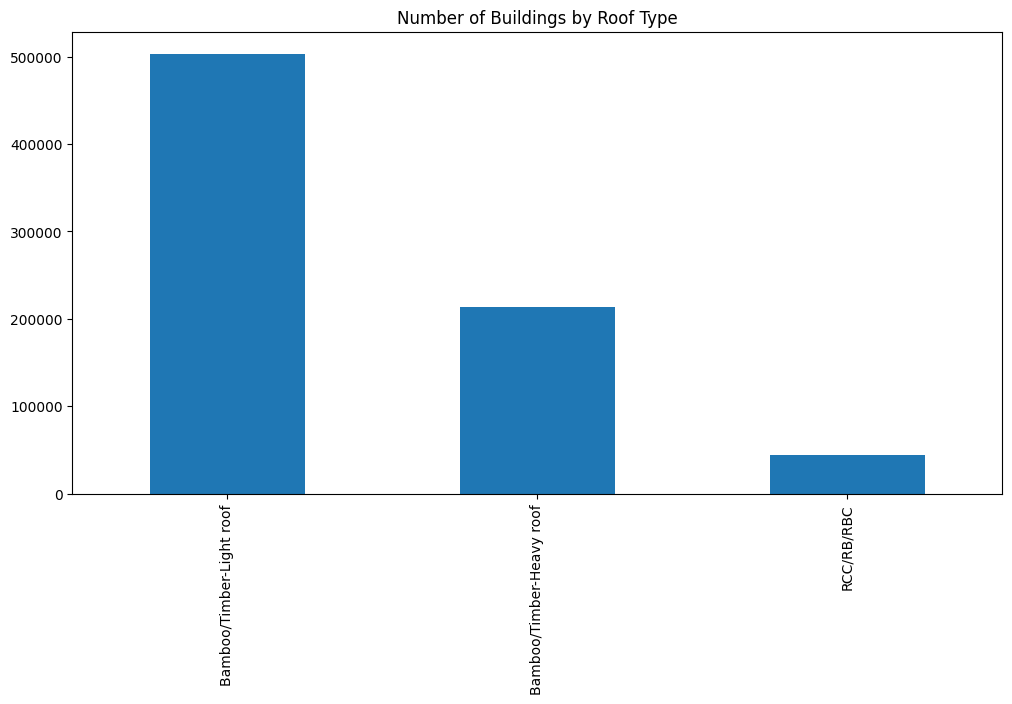

In [36]:
plt.figure(figsize = (12,6))
ax = df_stru.roof_type.value_counts().plot(kind = "bar")
plt.title("Number of Buildings by Roof Type")
plt.show()

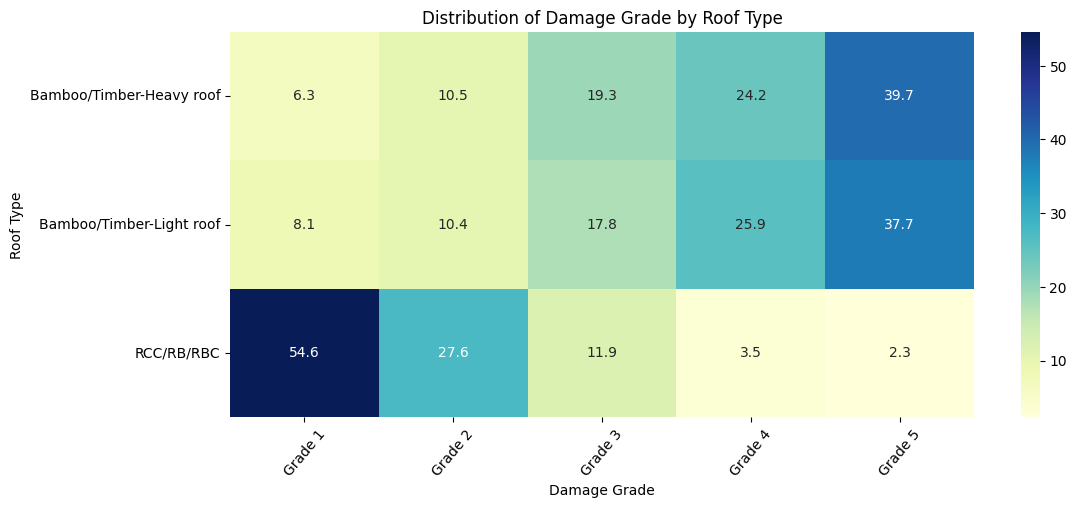

In [37]:

# Calculate counts
df_temp = df_stru.groupby(['roof_type', 'damage_grade']).size().reset_index(name='count')

# Calculate the sum of counts for each roof type
roof_type_totals = df_temp.groupby('roof_type')['count'].transform('sum')

# Calculate Proportion of grade
df_temp['percentage'] = 100 * df_temp['count'] / roof_type_totals

# Pivot table to rearrange the data for heatmap
df_pivot = df_temp.pivot(index='roof_type', columns='damage_grade', values='percentage')

# Plot chart
plt.figure(figsize=(12, 5))
ax = sns.heatmap(data=df_pivot, annot=True, fmt=".1f", cmap="YlGnBu")

# Rotate the x-axis labels
plt.xticks(rotation=50)

# Set the title and labels
plt.title("Distribution of Damage Grade by Roof Type")
plt.xlabel("Damage Grade")
plt.ylabel("Roof Type")

# Note: No need for legend in heatmap
# Display the plot
plt.show()


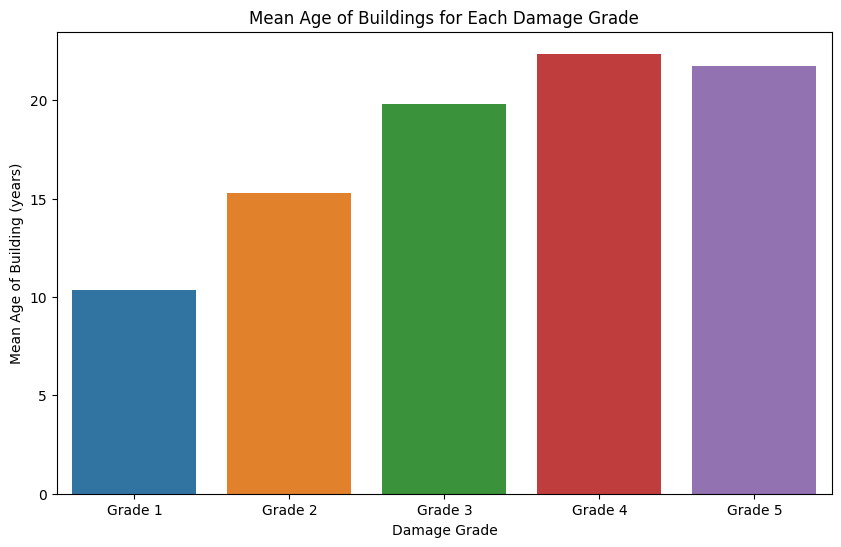

In [38]:
# Calculating the mean age of buildings for each damage grade
mean_age_per_grade = df.groupby('damage_grade')['age_building'].mean()

# Plotting the mean ages for each damage grade
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_age_per_grade.index, y=mean_age_per_grade.values, order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"])
plt.title('Mean Age of Buildings for Each Damage Grade')
plt.xlabel('Damage Grade')
plt.ylabel('Mean Age of Building (years)')
plt.show()

In [39]:
df.head()

,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,1,1,9.0,288,9,9,Flat,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
120101000021,12,1207,120703,1,1,15.0,364,9,9,Flat,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
120101000031,12,1207,120703,1,1,20.0,384,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
120101000041,12,1207,120703,1,1,20.0,312,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
120101000051,12,1207,120703,1,1,30.0,308,9,9,Flat,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [40]:
df.columns

Index(['district_id', 'vdcmun_id', 'ward_id', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed'],
      dtype='object')

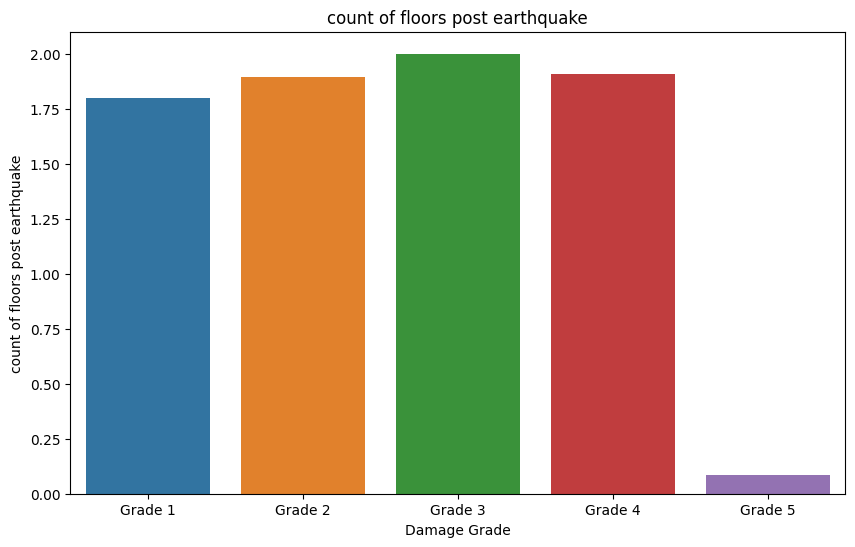

In [41]:
# # Calculating the mean age of buildings for each damage grade
# mean_age_per_grade = df.groupby('damage_grade')['count_floors_post_eq'].mean()

# # Plotting the mean ages for each damage grade
# plt.figure(figsize=(10, 6))
# sns.barplot(x=mean_age_per_grade.index, y=mean_age_per_grade.values, order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"])
# plt.title('count of floors post earthquake')
# plt.xlabel('Damage Grade')
# plt.ylabel('mean count of floors post earthquake')
# plt.show()

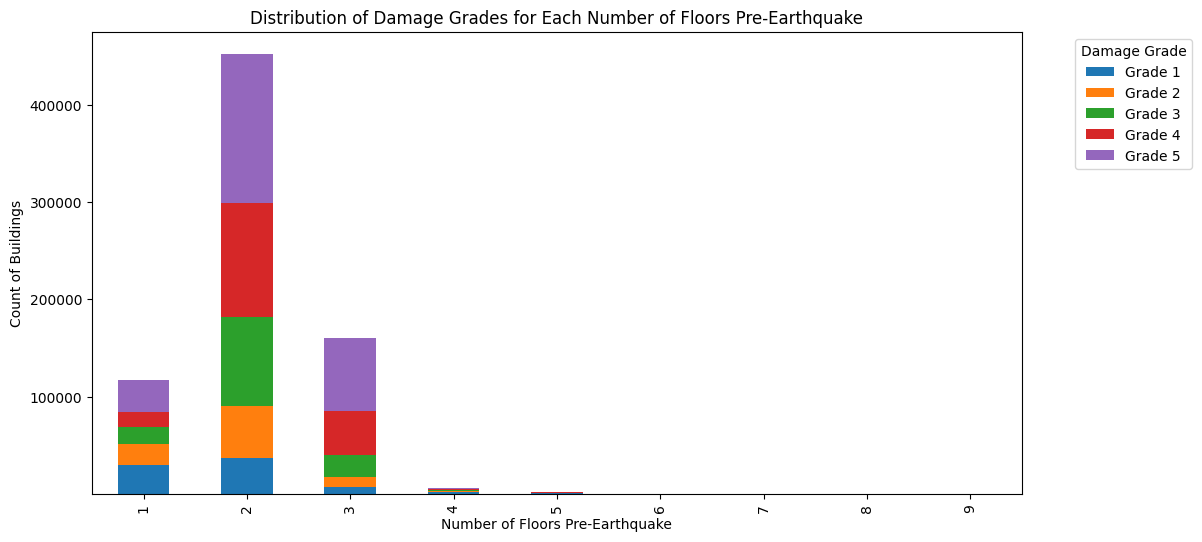

In [43]:
floors_pre_eq_damage_grade = df.groupby(['count_floors_pre_eq', 'damage_grade']).size().unstack(fill_value=0)
floors_pre_eq_damage_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Damage Grades for Each Number of Floors Pre-Earthquake')
plt.xlabel('Number of Floors Pre-Earthquake')
plt.ylabel('Count of Buildings')
plt.legend(title='Damage Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [42]:
df.count_floors_pre_eq.value_counts()

2    452677
3    159933
1    116812
4      6047
5      1557
6       332
7        88
9        13
8        12
Name: count_floors_pre_eq, dtype: int64

In [79]:
destructed_floors = df['count_floors_pre_eq'] - df['count_floors_post_eq']
destructed_floors.describe().to_frame('value')

,value
count,736627.000000
mean,0.821241
std,1.080151
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,9.000000


In [80]:
df[destructed_floors < 0]


,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,...,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,damage_encoded,damage_grade_encoded,condition_post_eq_encoded,has_superstructure_rc,combined_hue
building_id,,,,,,,,,,,,,,,,,,,,,


In [81]:
destructed_floors = df['count_floors_pre_eq'] - df['count_floors_post_eq']
destructed_floors.describe().to_frame('value')

df[destructed_floors < 0]
rows_to_drop = df[destructed_floors < 0].index

df.drop(rows_to_drop, axis=0, inplace=True)

In [82]:
(df['height_ft_pre_eq'] - df['height_ft_post_eq']).describe()

count    736627.000000
mean          6.063818
std           8.161577
min         -80.000000
25%           0.000000
50%           0.000000
75%          14.000000
max          99.000000
dtype: float64

In [49]:
df.columns

Index(['district_id', 'vdcmun_id', 'ward_id', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed'],
      dtype='object')

In [47]:
df['has_superstructure_cement_mortar_stone'].value_counts()

0    724648
1     11979
Name: has_superstructure_cement_mortar_stone, dtype: int64

In [48]:
df['damage_encoded'] = df.damage_grade.str[-1].astype('int')

In [ ]:
df.condition_post_eq.unique()

array(['Damaged-Used in risk', 'Damaged-Repaired and used',
       'Damaged-Rubble unclear', 'Not damaged', 'Damaged-Not used',
       'Damaged-Rubble clear', 'Damaged-Rubble Clear-New building built',
       'Covered by landslide'], dtype=object)

In [50]:
ordinal_mapping = {
    'Not damaged': 0,
    'Damaged-Repaired and used': 1,
    'Damaged-Not used': 2,
    'Damaged-Used in risk': 3,
    'Damaged-Rubble unclear': 4,
    'Damaged-Rubble clear': 5,
    'Damaged-Rubble Clear-New building built': 6,
    'Covered by landslide': 7
}
# Mapping dictionary for damage grades
damage_mapping = {
    'Grade 1': 1,
    'Grade 2': 2,
    'Grade 3': 3,
    'Grade 4': 4,
    'Grade 5': 5
}


df['damage_grade_encoded'] = df['damage_grade'].map(damage_mapping)
df['condition_post_eq_encoded'] = df['condition_post_eq'].map(ordinal_mapping)




In [51]:
df.damage_grade.unique()

array(['Grade 3', 'Grade 5', 'Grade 2', 'Grade 1', 'Grade 4'],
      dtype=object)

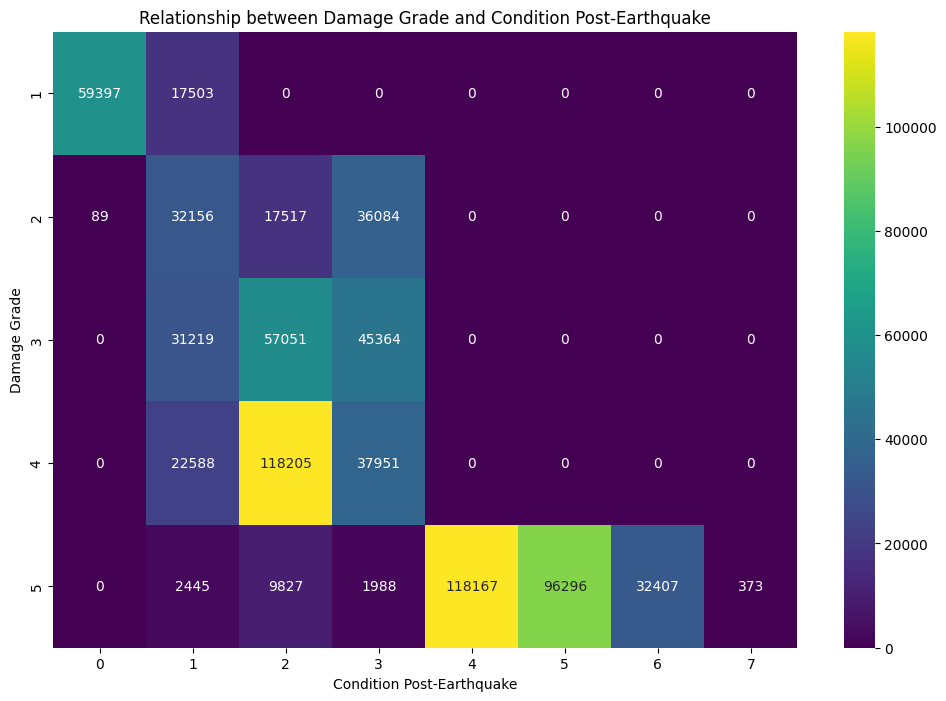

In [52]:
# Create a cross-tabulation between 'damage_grade' and 'condition_post_eq'
cross_tab = pd.crosstab(df['damage_grade_encoded'], df['condition_post_eq_encoded'])

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d', cbar=True)
plt.title('Relationship between Damage Grade and Condition Post-Earthquake')
plt.xlabel('Condition Post-Earthquake')
plt.ylabel('Damage Grade')
plt.show()


In [53]:
df.foundation_type.unique()

array(['Other', 'Mud mortar-Stone/Brick', 'Cement-Stone/Brick',
       'Bamboo/Timber', 'RC'], dtype=object)

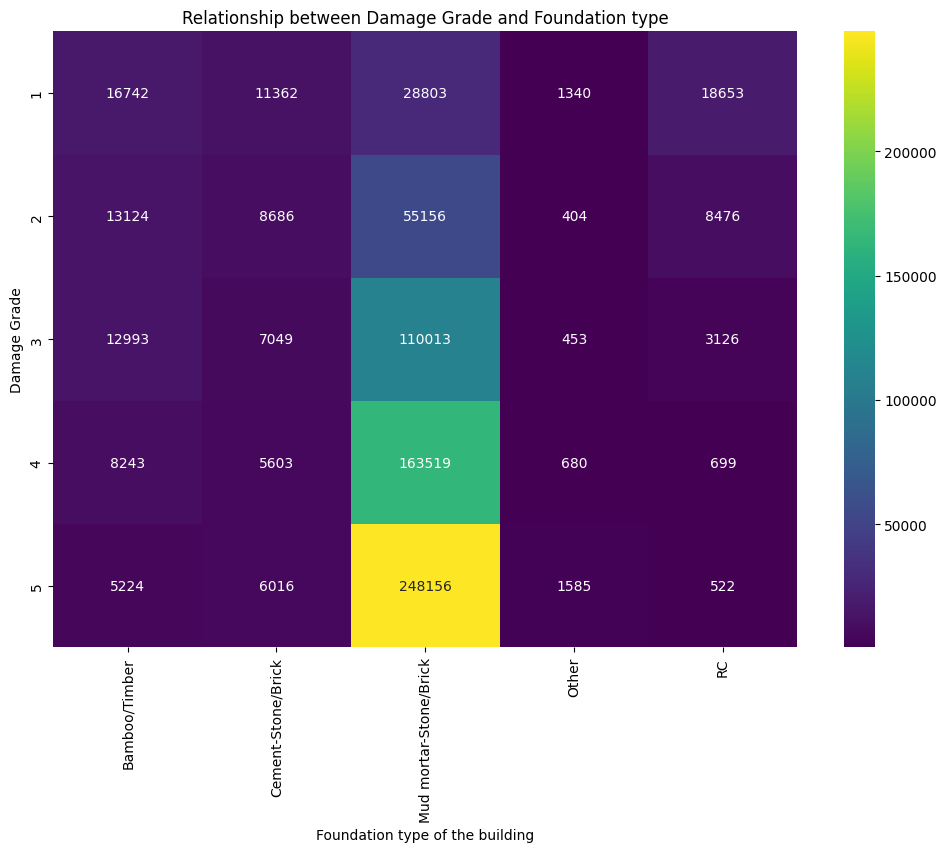

In [54]:
# Create a cross-tabulation between 'damage_grade' and 'condition_post_eq'
cross_tab = pd.crosstab(df['damage_grade_encoded'], df['foundation_type'])

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d', cbar=True)
plt.title('Relationship between Damage Grade and Foundation type')
plt.xlabel('Foundation type of the building')
plt.ylabel('Damage Grade')
plt.show()


In [55]:
df.groupby('foundation_type')['damage_grade_encoded'].mean()

foundation_type
Bamboo/Timber             2.504367
Cement-Stone/Brick        2.644204
Mud mortar-Stone/Brick    3.903280
Other                     3.171672
RC                        1.600871
Name: damage_grade_encoded, dtype: float64

**RC(Reinforced concrete) is the most invulnerable foundation type)**

In [56]:
df.has_superstructure_rc_engineered.value_counts(normalize=True)

0    0.983454
1    0.016546
Name: has_superstructure_rc_engineered, dtype: float64

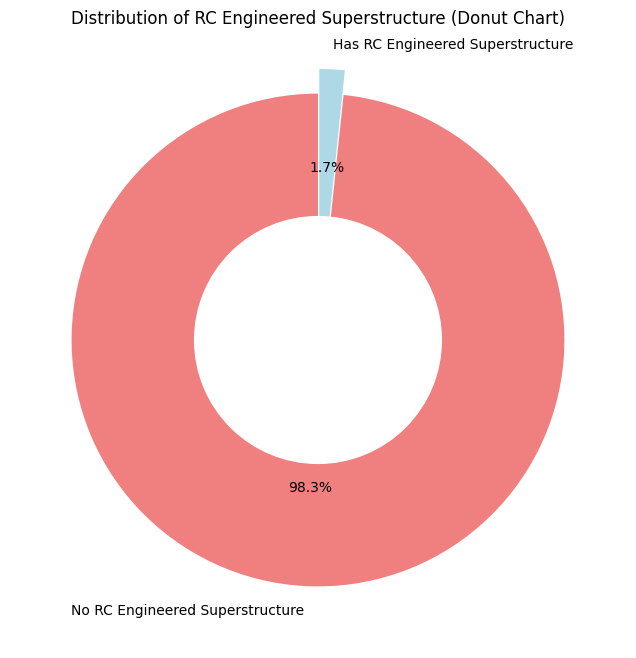

In [57]:
import matplotlib.pyplot as plt

# Data
labels = ['No RC Engineered Superstructure', 'Has RC Engineered Superstructure']
sizes = df['has_superstructure_rc_engineered'].value_counts(normalize=True)
colors = ['lightcoral', 'lightblue']
explode = (0, 0.1)

# Outer ring
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie([1], radius=0.7, colors=['white'], startangle=90)
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)

# Draw center circle to create the donut chart
centre_circle = plt.Circle((0, 0), 0.5, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of RC Engineered Superstructure (Donut Chart)')
plt.show()


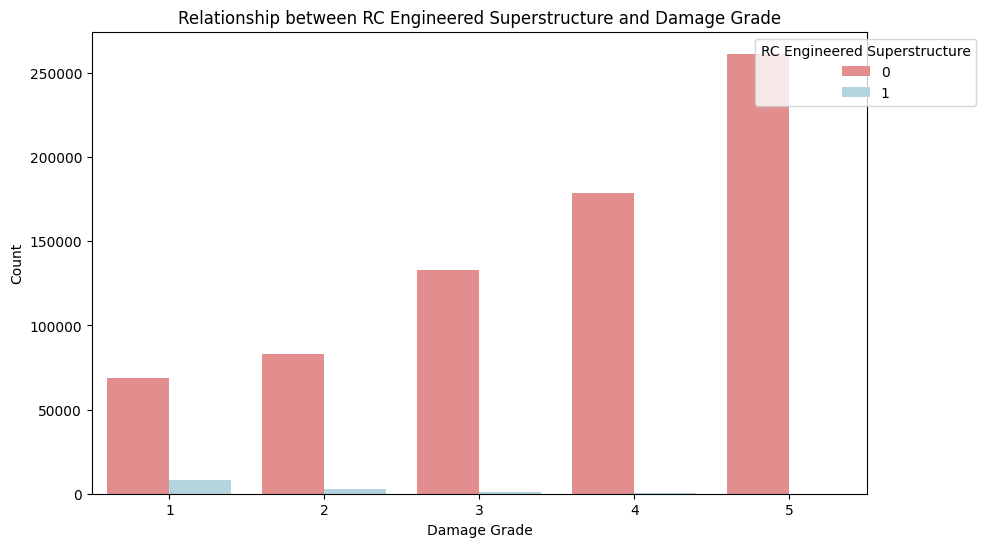

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='damage_grade_encoded', hue='has_superstructure_rc_engineered', palette=['lightcoral', 'lightblue'])
plt.title('Relationship between RC Engineered Superstructure and Damage Grade')
plt.xlabel('Damage Grade')
plt.ylabel('Count')
plt.legend(title='RC Engineered Superstructure', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


In [59]:
df.has_superstructure_rc_non_engineered.value_counts(normalize=True)

0    0.959733
1    0.040267
Name: has_superstructure_rc_non_engineered, dtype: float64

In [60]:
df['has_superstructure_rc'] = df[['has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered']].max(axis=1)

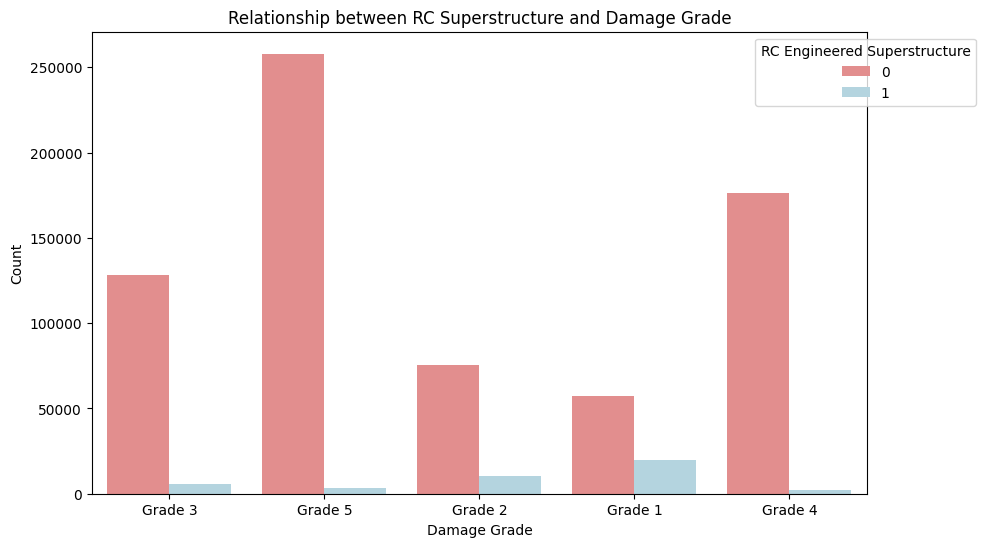

In [61]:
df['has_superstructure_rc'] = df[['has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered']].max(axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='damage_grade', hue='has_superstructure_rc', palette=['lightcoral', 'lightblue', 'gold'])
plt.title('Relationship between RC Superstructure and Damage Grade')
plt.xlabel('Damage Grade')
plt.ylabel('Count')
plt.legend(title='RC Engineered Superstructure', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

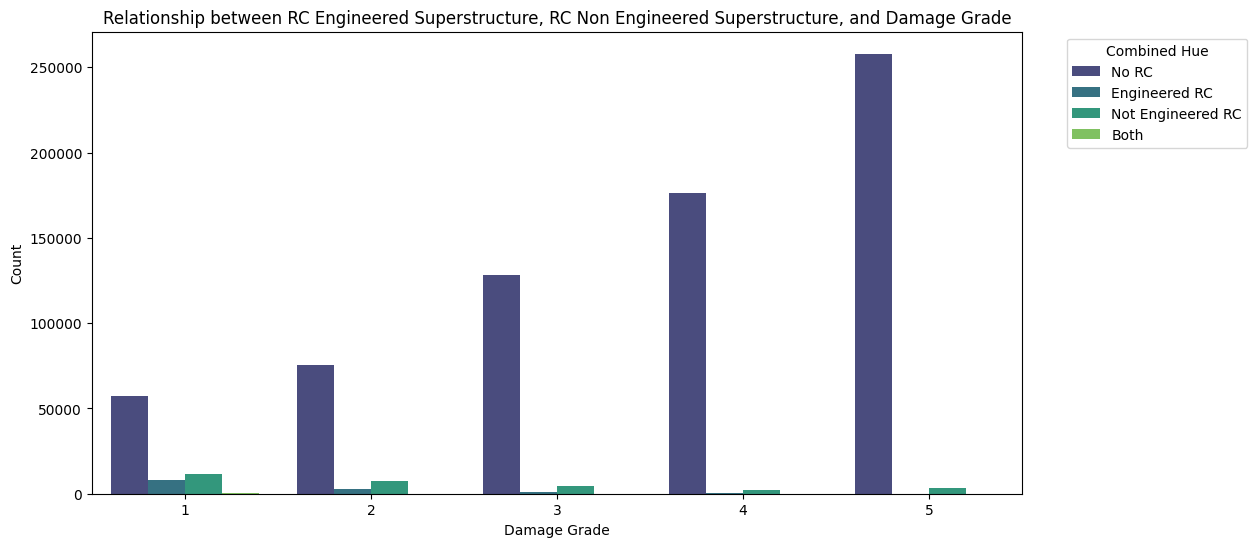

In [62]:
# Combine the two columns into a new column for hue
df['combined_hue'] = df['has_superstructure_rc_engineered'].astype(str) + '_' + df['has_superstructure_rc_non_engineered'].astype(str)
# Mapping dictionary for damage grades
hue_mapping = {
    '0_0': 'No RC',
    '0_1': 'Not Engineered RC',
    '1_0': 'Engineered RC',
    '1_1': 'Both',
}

# Apply the mapping to create a new column 'damage_grade_encoded'
df['combined_hue'] = df['combined_hue'].map(hue_mapping)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='damage_grade_encoded', hue='combined_hue', palette='viridis')
plt.title('Relationship between RC Engineered Superstructure, RC Non Engineered Superstructure, and Damage Grade')
plt.xlabel('Damage Grade')
plt.ylabel('Count')
plt.legend(title='Combined Hue', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


In [63]:
df.height_ft_pre_eq.describe()

count    736627.000000
mean         16.031274
std           5.455711
min           6.000000
25%          12.000000
50%          16.000000
75%          18.000000
max          99.000000
Name: height_ft_pre_eq, dtype: float64

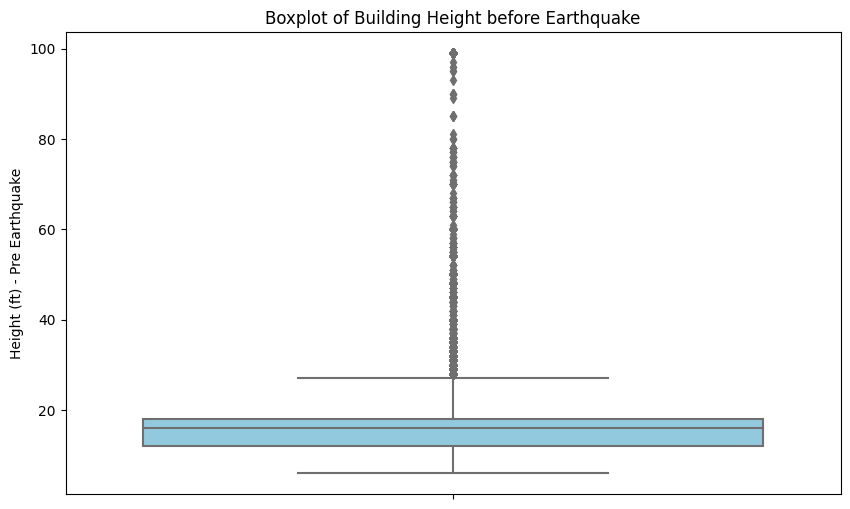

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='height_ft_pre_eq', color='skyblue')
plt.title('Boxplot of Building Height before Earthquake')
plt.ylabel('Height (ft) - Pre Earthquake')
plt.show()


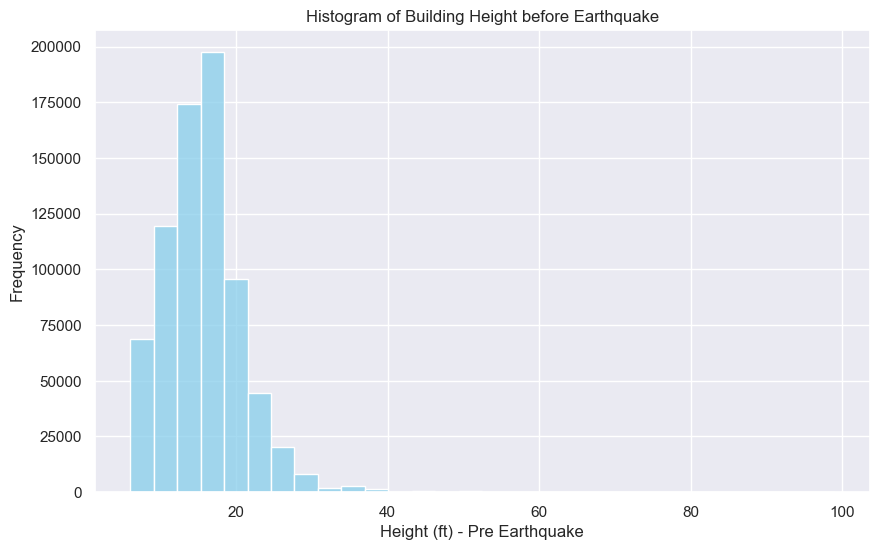

In [116]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='height_ft_pre_eq', bins=30, color='skyblue')
plt.title('Histogram of Building Height before Earthquake')
plt.xlabel('Height (ft) - Pre Earthquake')
plt.ylabel('Frequency')
plt.show()


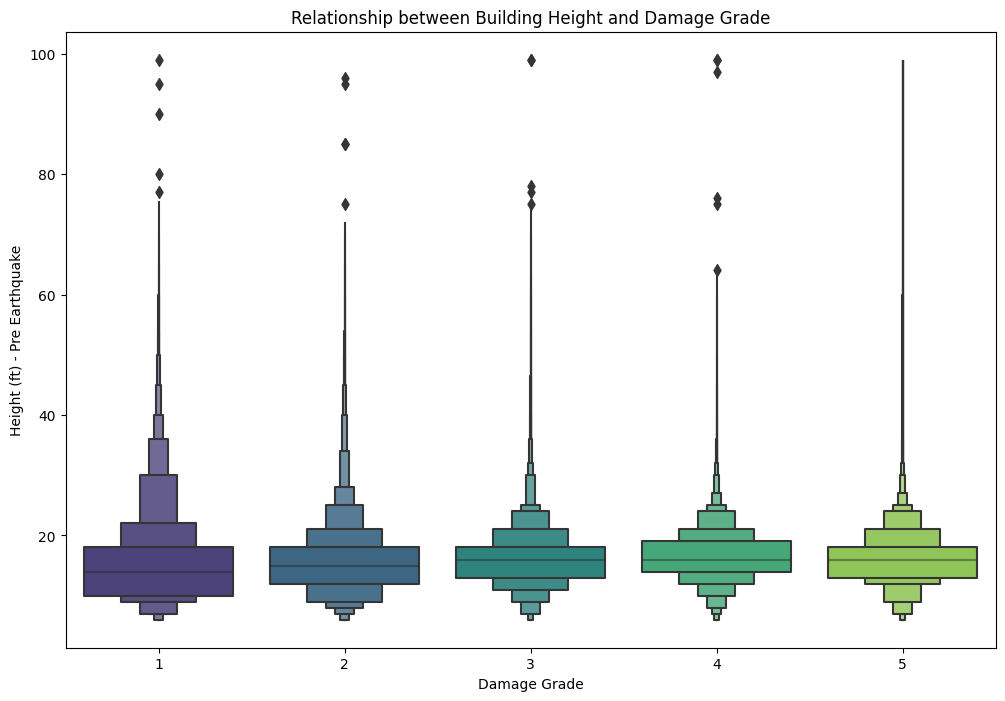

In [65]:
plt.figure(figsize=(12, 8))
sns.boxenplot(data=df, x='damage_grade_encoded', y='height_ft_pre_eq', palette='viridis')
plt.title('Relationship between Building Height and Damage Grade')
plt.xlabel('Damage Grade')
plt.ylabel('Height (ft) - Pre Earthquake')
plt.show()


In [66]:
df.plinth_area_sq_ft.describe()

count    736627.000000
mean        408.477820
std         228.343797
min          70.000000
25%         280.000000
50%         360.000000
75%         475.000000
max        5000.000000
Name: plinth_area_sq_ft, dtype: float64

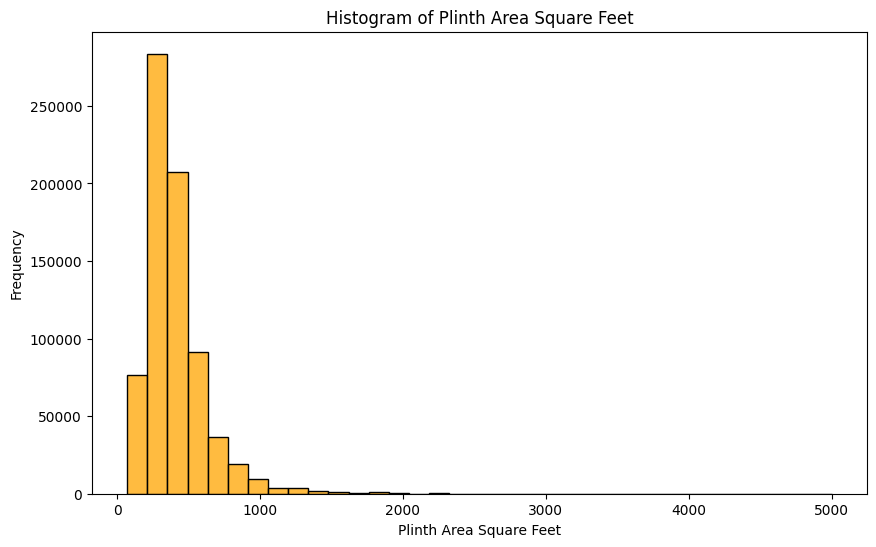

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='plinth_area_sq_ft', bins=35, color='orange')
plt.title('Histogram of Plinth Area Square Feet')
plt.xlabel('Plinth Area Square Feet')
plt.ylabel('Frequency')
plt.show()


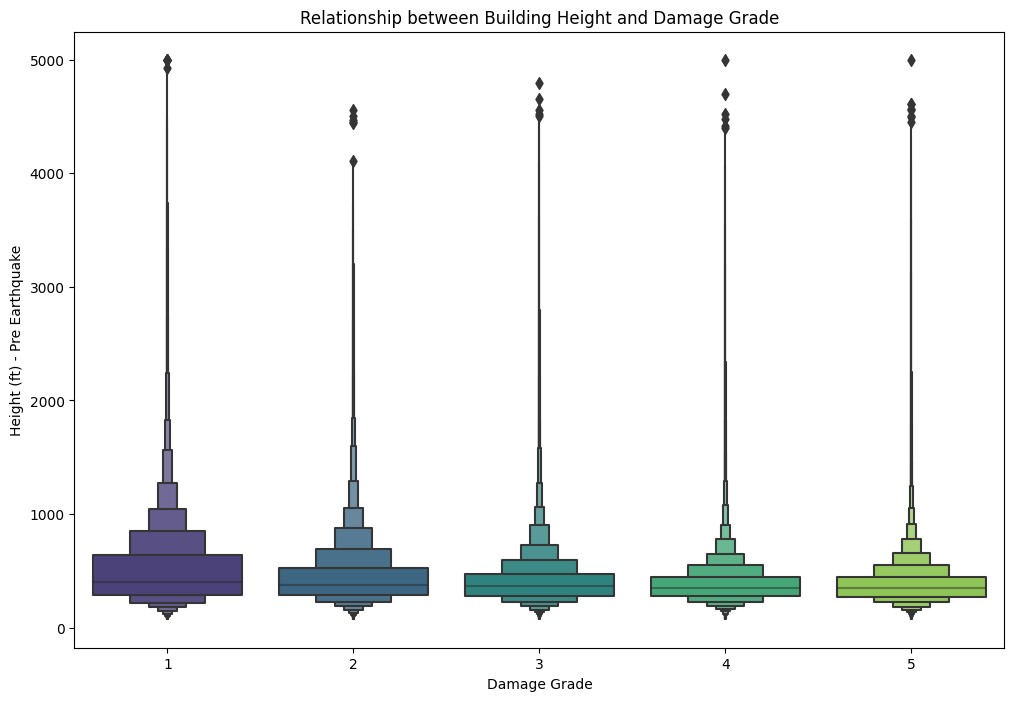

In [68]:
plt.figure(figsize=(12, 8))
sns.boxenplot(data=df, x='damage_grade_encoded', y='plinth_area_sq_ft', palette='viridis')
plt.title('Relationship between Building Height and Damage Grade')
plt.xlabel('Damage Grade')
plt.ylabel('Height (ft) - Pre Earthquake')
plt.show()

In [69]:
df.ground_floor_type.value_counts()

Mud            596232
RC              71845
Brick/Stone     64002
Timber           3512
Other            1036
Name: ground_floor_type, dtype: int64

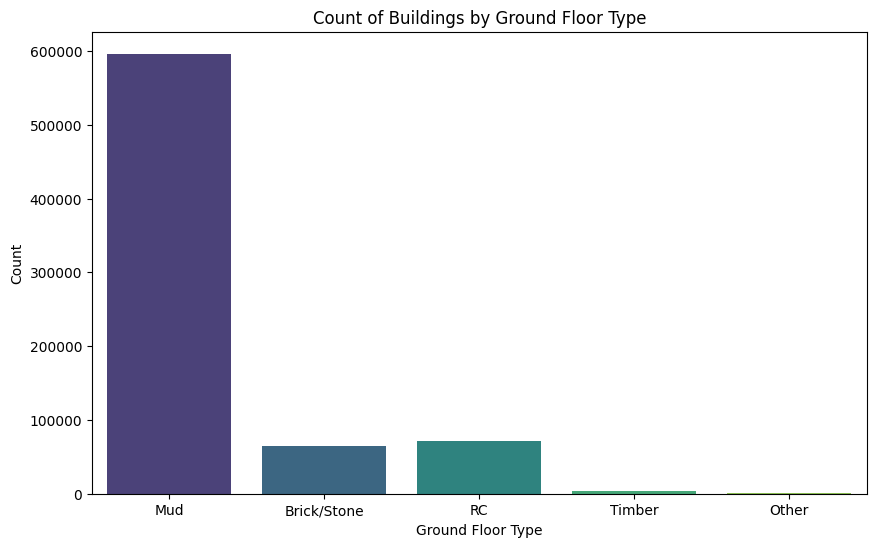

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ground_floor_type', palette='viridis')
plt.title('Count of Buildings by Ground Floor Type')
plt.xlabel('Ground Floor Type')
plt.ylabel('Count')
plt.show()


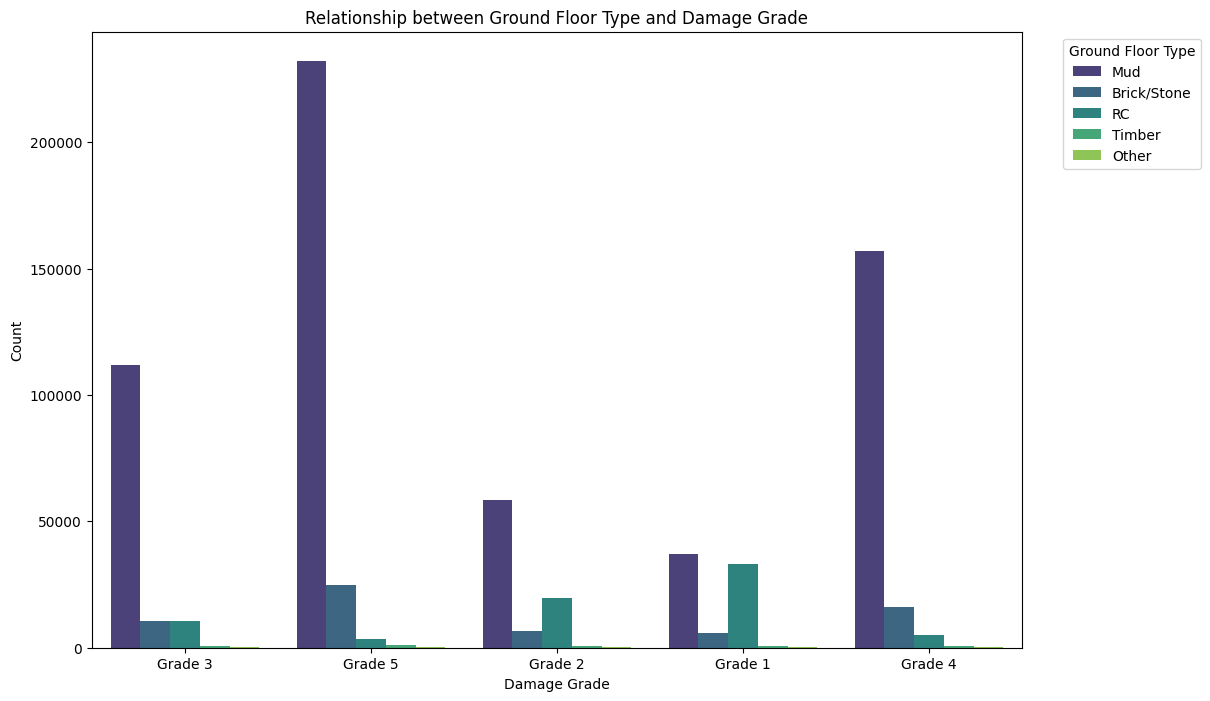

In [72]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='damage_grade', hue='ground_floor_type', palette='viridis')
plt.title('Relationship between Ground Floor Type and Damage Grade')
plt.xlabel('Damage Grade')
plt.ylabel('Count')
plt.legend(title='Ground Floor Type', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


<Figure size 1200x800 with 0 Axes>

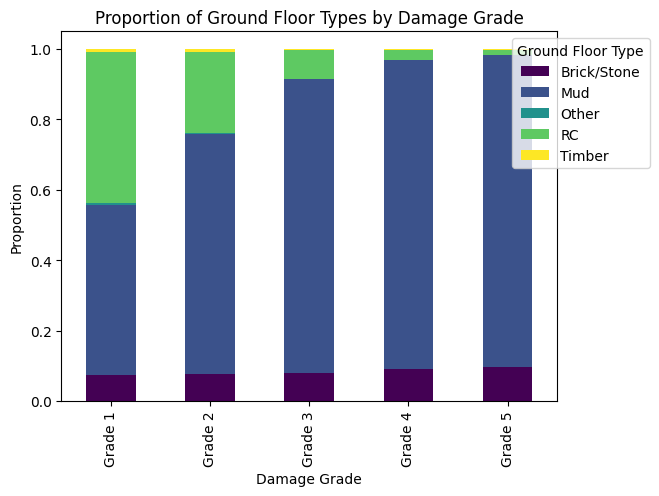

In [73]:
cross_tab = pd.crosstab(df['damage_grade'], df['ground_floor_type'], normalize='index')

plt.figure(figsize=(12, 8))
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Proportion of Ground Floor Types by Damage Grade')
plt.xlabel('Damage Grade')
plt.ylabel('Proportion')
plt.legend(title='Ground Floor Type', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

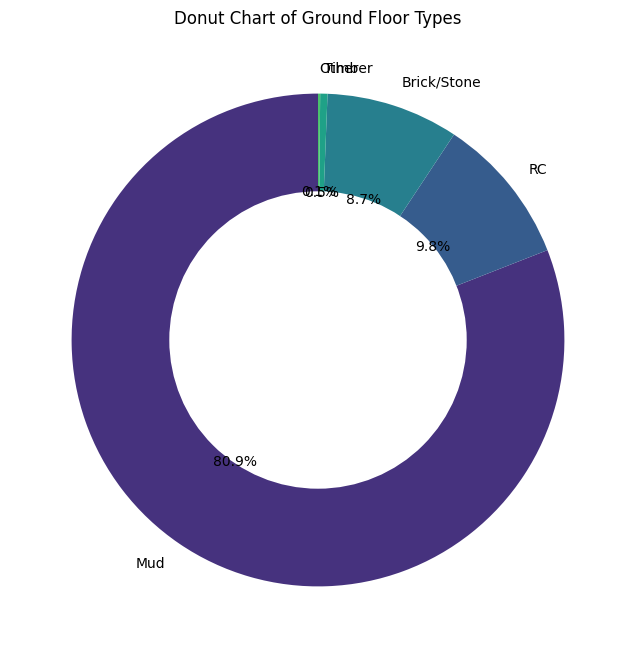

In [74]:
import matplotlib.pyplot as plt

# Count the occurrences of each ground floor type
ground_floor_counts = df['ground_floor_type'].value_counts()

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(ground_floor_counts, labels=ground_floor_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'), wedgeprops=dict(width=0.4))

# Draw center circle to create the donut chart
centre_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Donut Chart of Ground Floor Types')
plt.show()


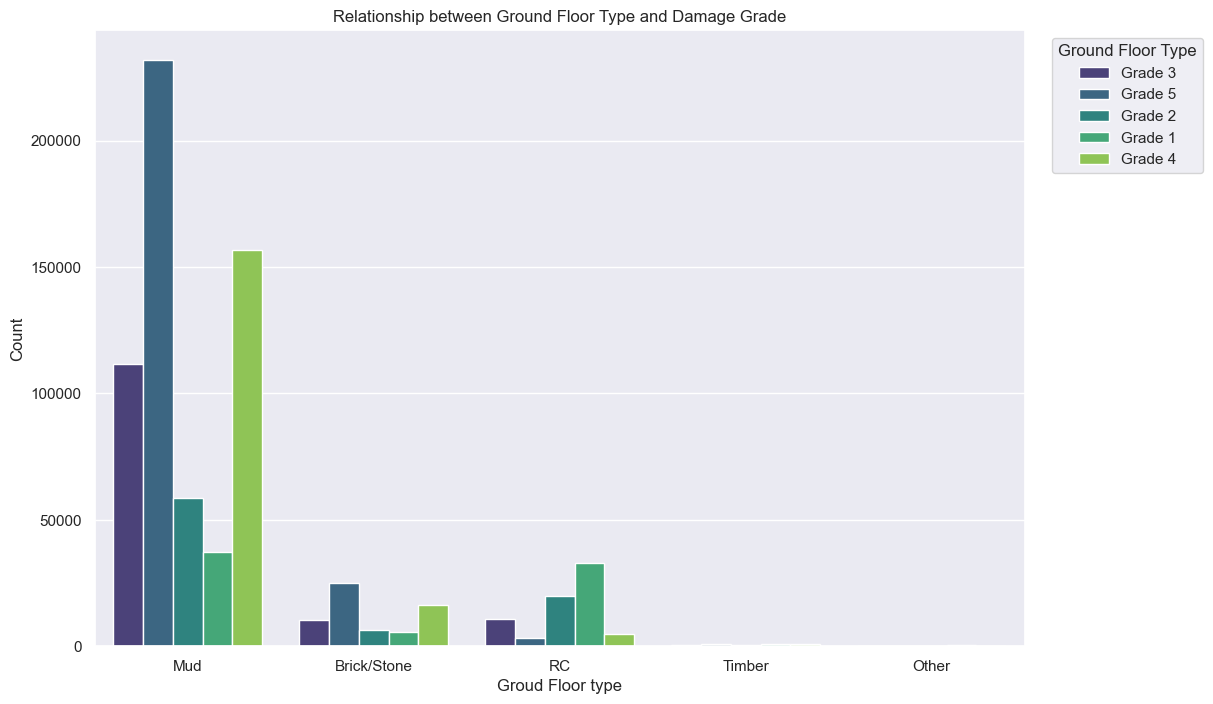

In [142]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='ground_floor_type', hue='damage_grade', palette='viridis')
plt.title('Relationship between Ground Floor Type and Damage Grade')
plt.xlabel('Groud Floor type')
plt.ylabel('Count')
plt.legend(title='Ground Floor Type', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


In [144]:
df.plan_configuration.value_counts()

Rectangular                        706265
Square                              17148
L-shape                             10037
T-shape                               969
Multi-projected                       930
Others                                514
U-shape                               448
E-shape                               140
Building with Central Courtyard        97
H-shape                                79
Name: plan_configuration, dtype: int64

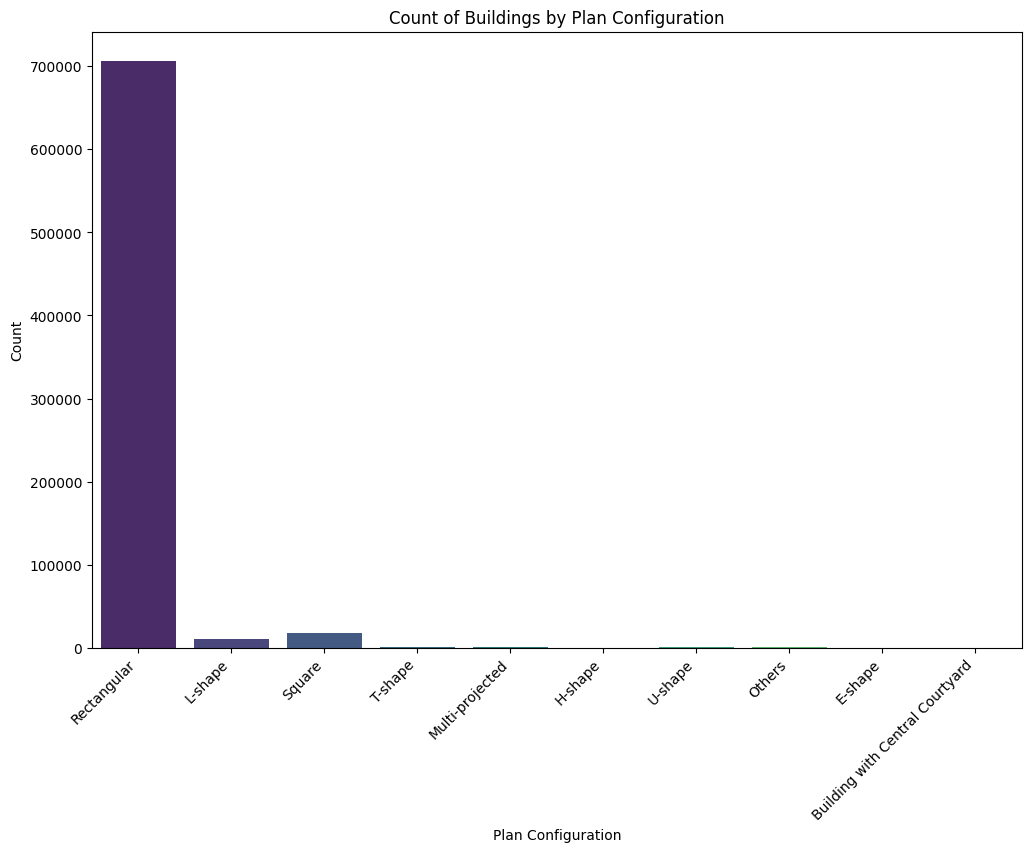

In [75]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='plan_configuration', palette='viridis')
plt.title('Count of Buildings by Plan Configuration')
plt.xlabel('Plan Configuration')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

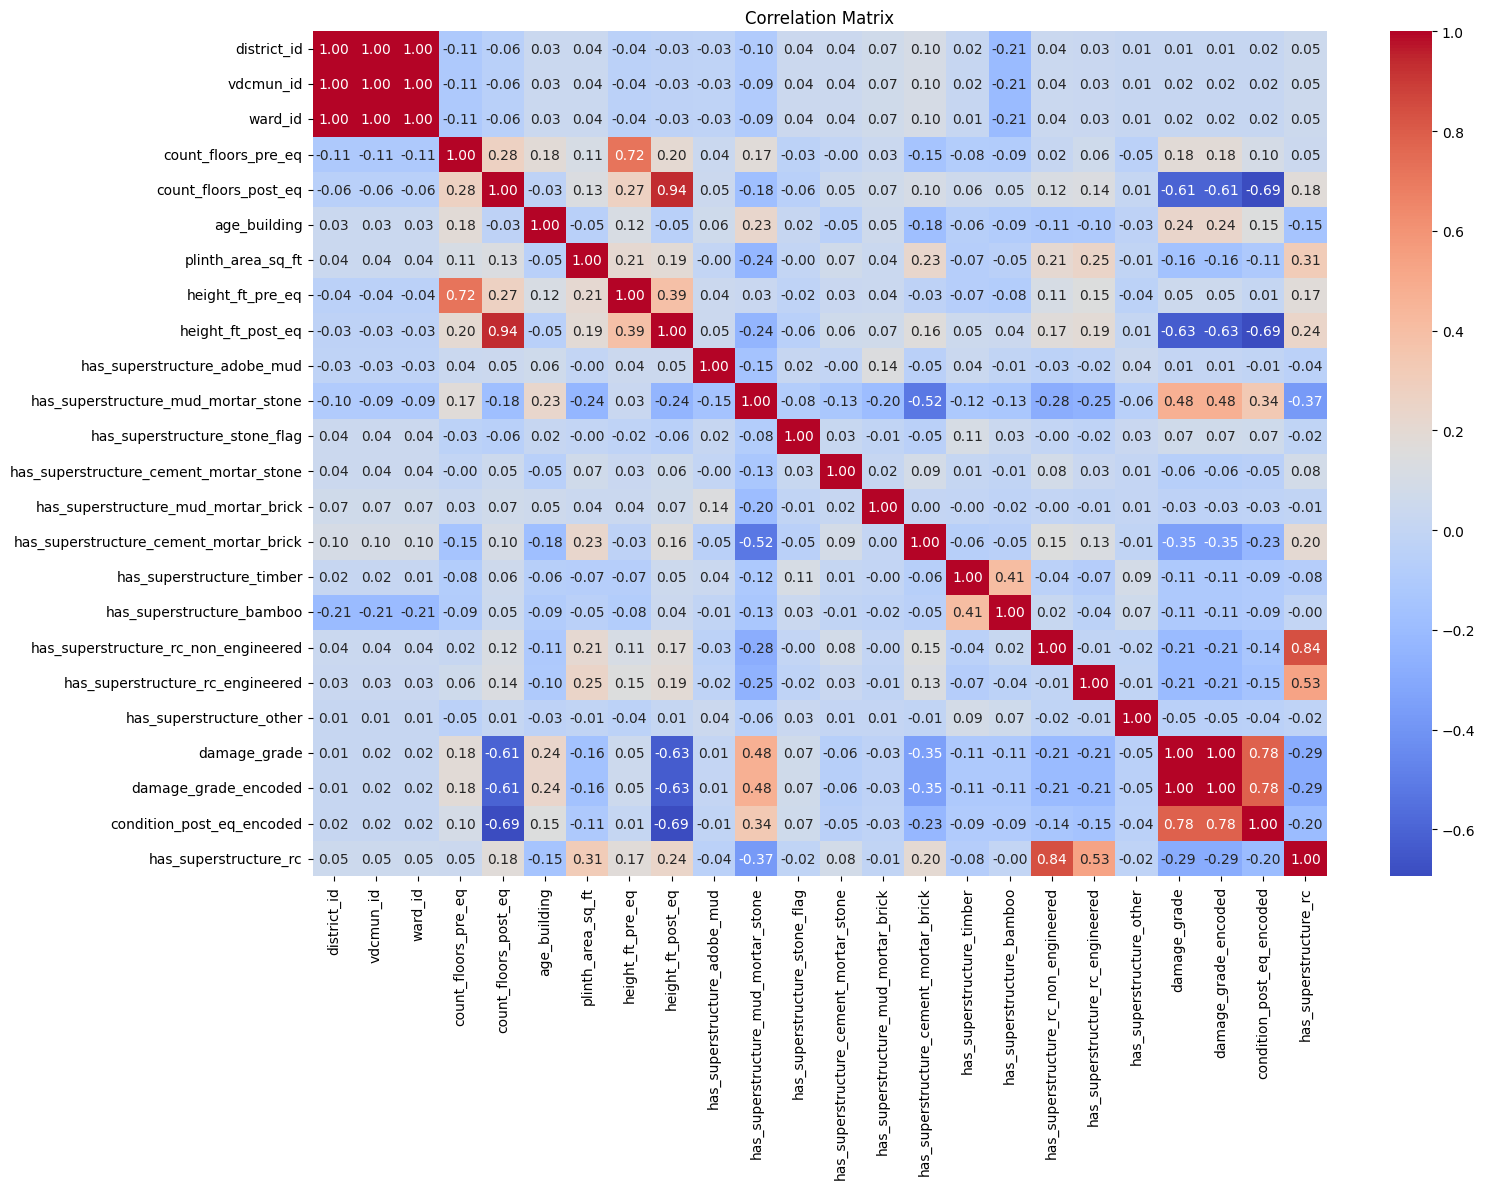

In [78]:
# Correlation Matrix
# Convert 'damage_grade' to numerical values if it's categorical
# damage_grade_mapping = {'Grade 1': 1, 'Grade 2': 2, 'Grade 3': 3, 'Grade 4': 4, 'Grade 5': 5}
# df['damage_grade'] = df['damage_grade'].map(damage_grade_mapping)

# Use one-hot encoding for other categorical columns if necessary
# Example for one-hot encoding the 'land_surface_condition' column
# df = pd.get_dummies(df, columns=['land_surface_condition', 'foundation_type', ...], drop_first=True)

# Select only the numerical columns for the correlation matrix
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()